# Analisis exploratorio de datos

In [1]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('../data/comentarios_mejorados.csv', sep='|')

# Mostrar las filas y columnas del DataFrame
print(df.shape)

# Mostrar las primeras filas del DataFrame
print(df.head())

# Obtener información sobre el DataFrame
print(df.info())

# Obtener estadísticas descriptivas del DataFrame
print(df.describe())

(1036, 14)
                  channelId      videoId  \
0  UCmb0LnmFYceH7toqgmUTJDA  dia88km2PWM   
1  UCmb0LnmFYceH7toqgmUTJDA          NaN   
2  UCmb0LnmFYceH7toqgmUTJDA  dia88km2PWM   
3  UCmb0LnmFYceH7toqgmUTJDA  dia88km2PWM   
4  UCmb0LnmFYceH7toqgmUTJDA  dia88km2PWM   

                                         textDisplay  \
0  PREGUNTA: Nunca jugué a Breath of the Wild. ¿D...   
1  No lo veo necesario si no te interesa la historia   
2  El mejor juego de la historia es Red dead Rede...   
3  Lo estoy jugando y para mi opinion todos los a...   
4  Nah el nuevo mejor juego de la historia es Bal...   

                                        textOriginal    authorDisplayName  \
0  PREGUNTA: Nunca jugué a Breath of the Wild. ¿D...          @josecarpin   
1  No lo veo necesario si no te interesa la historia     @ElSpringTrap936   
2  El mejor juego de la historia es Red dead Rede...     @manueljerez5775   
3  Lo estoy jugando y para mi opinion todos los a...  @leonardosuarez9176   
4 

## 1. Elimitar columnas que no aportan informacion
En este caso se eliminan las columnas que no aportan informacion al modelo y nos quedamos con el comentario. Eliminamos también los comentarios que son respuestas a otros comentarios basandonos en el hecho de que no aportan información al modelo.

Para ello nos fijamos en el parent_id, si es nulo es un comentario raiz, si no es una respuesta a otro comentario.

In [2]:
# Contamos las filas donde el parent_id sea nulo
print(df.parentId.isnull().sum())
print(df.parentId.isnull().value_counts())

# Filtrar las filas donde el parent_id sea nulo
df = df[df.parentId.isnull()]

# Contamos las filas que quedaron
print(df.shape)


362
False    674
True     362
Name: parentId, dtype: int64
(362, 14)


In [3]:
columnas_a_eliminar = ['channelId', 'videoId', 'textOriginal', 'authorDisplayName', 
                       'authorProfileImageUrl', 'authorChannelUrl', 'authorChannelId', 
                       'canRate', 'viewerRating', 'likeCount', 'publishedAt', 
                       'updatedAt', 'parentId']

# Eliminar las columnas
df = df.drop(columnas_a_eliminar, axis=1)

# Mostrar las primeras filas del DataFrame
print(df.head())

                                          textDisplay
0   PREGUNTA: Nunca jugué a Breath of the Wild. ¿D...
2   El mejor juego de la historia es Red dead Rede...
3   Lo estoy jugando y para mi opinion todos los a...
4   Nah el nuevo mejor juego de la historia es Bal...
26  Debo ser la única persona en el mundo que se a...


## 2. Limpieza de texto
Se eliminan los caracteres especiales, se pasa todo a minusculas y se eliminan espaacios en blanco innecesarios. Para usar Vader vamos a dejar sin eliminar los emojis ni caracteres especiales, además de no tokenizar el texto.

In [4]:
df_vader = df.copy()

print(df_vader.head())

                                          textDisplay
0   PREGUNTA: Nunca jugué a Breath of the Wild. ¿D...
2   El mejor juego de la historia es Red dead Rede...
3   Lo estoy jugando y para mi opinion todos los a...
4   Nah el nuevo mejor juego de la historia es Bal...
26  Debo ser la única persona en el mundo que se a...


In [5]:
import re

# Función para limpiar el texto
def clean_text(text):
    # Eliminar emojis y caracteres especiales manteniendo las tildes y ñ
    text = re.sub(r'([^\s\wñáéíóú]|_)+', '', text)
    
    # Minúsculas
    text = text.lower()
    
    # Eliminar espacios en blanco innecesarios
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Aplicar la función de limpieza de texto a la columna 'textDisplay'
df['textDisplay'] = df['textDisplay'].apply(clean_text)

# Mostrar las primeras filas del DataFrame
print(df.head())

                                          textDisplay
0   pregunta nunca jugué a breath of the wild debe...
2   el mejor juego de la historia es red dead rede...
3   lo estoy jugando y para mi opinion todos los a...
4   nah el nuevo mejor juego de la historia es bal...
26  debo ser la única persona en el mundo que se a...


## 3. Tokenizacion
Se separa el texto en palabras individuales. Esto nos permite analizar cada palabra por separado y no como una cadena de texto.


In [6]:
import nltk
# Descargar el paquete 'punkt' de NLTK solo es necesario la primera vez
# nltk.download('punkt')

# Tokenizar el texto
df['textDisplay'] = df['textDisplay'].apply(nltk.word_tokenize)

print(df.head())


                                          textDisplay
0   [pregunta, nunca, jugué, a, breath, of, the, w...
2   [el, mejor, juego, de, la, historia, es, red, ...
3   [lo, estoy, jugando, y, para, mi, opinion, tod...
4   [nah, el, nuevo, mejor, juego, de, la, histori...
26  [debo, ser, la, única, persona, en, el, mundo,...


## 4. Eliminacion de stopwords
Se eliminan las palabras que no aportan informacion al modelo. Estas palabras son las que se encuentran en la lista de stopwords como por ejemplo: "el", "la", "de", etc.

In [7]:
# Eliminar las palabras vacías
from nltk.corpus import stopwords
# Descargar las palabras vacías de NLTK solo es necesario la primera vez
nltk.download('stopwords')
stopwords = stopwords.words('spanish')

# Función para eliminar las palabras vacías
def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

# Eliminar las palabras vacías
df['textDisplay'] = df['textDisplay'].apply(remove_stopwords)

print(df.head())

                                          textDisplay
0   [pregunta, nunca, jugué, breath, of, the, wild...
2   [mejor, juego, historia, red, dead, redemption...
3   [jugando, opinion, analisis, juego, estan, sup...
4   [nah, nuevo, mejor, juego, historia, baldurs, ...
26  [debo, ser, única, persona, mundo, aburrió, bo...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dylan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 5. Stemming o lematizacion
Se eliminan los sufijos de las palabras para quedarnos con la raiz de la palabra. Esto nos permite reducir el numero de palabras que se tienen que analizar. Por ejemplo: "corriendo" se convierte en "correr". 

Esto es útil en análisis de sentimientos ya que la raíz de la palabra puede ser más importante que la palabra en sí. Por ejemplo, "bueno" y "mejor" tienen la misma raíz, "buen", por lo que se puede decir que son similares.

Para lematizar se utiliza la libreria de Spacy, ya que ntltk no tiene soporte para el idioma español.

En nuestro caso instalaremos una versión precompilada de Spacy para el idioma español, ya que la compilación de la libreria puede tardar mucho tiempo.

" python -m spacy download es_core_news_sm "

In [8]:
import spacy

# Cargar el modelo de lenguaje español de Spacy
nlp = spacy.load('es_core_news_sm')

# Función para lematizar el texto
def lemmatization(texts):
    output = []
    changed_words = []
    for text in texts:
        # Crear una lista de palabras antes de la lematización
        words_before = text
        
        # Lematizar el texto
        doc = nlp(" ".join(words_before)) 
        words_after = [token.lemma_ for token in doc]
        
        # Comparar las palabras antes y después de la lematización
        for before, after in zip(words_before, words_after):
            if before != after:
                changed_words.append((before, after))
        
        output.append(words_after)
    
    # print("Palabras que han cambiado después de la lematización:")
    # for before, after in changed_words[:5]:
    #     print(f"{before} -> {after}")
    
    return output

# Lematizar el texto
df['textDisplay'] = lemmatization(df['textDisplay'])

In [9]:
print(df.head())

                                          textDisplay
0   [preguntar, nunca, jugar, breath, of, the, wil...
2   [mejor, juego, historio, red, dead, redemption...
3   [jugar, opinion, analisis, juego, estar, super...
4   [nah, nuevo, mejor, juego, historia, baldurs, ...
26  [deber, ser, único, persona, mundo, aburrir, b...


# Textblob para asignar polaridad y subjetividad a los comentarios positivos, negativos y neutros
Con Textblob podemos asignar una polaridad y subjetividad a cada comentario, de esta forma podemos analizar los comentarios positivos, negativos y neutros y etiquetarlos como tal.

Posteriormente, este dataset ya etiquetado por textblob se utilizará para entrenar un modelo de clasificación propio y compararlo con la etiquetación manual de otro dataset.

In [10]:
from textblob import TextBlob

def classify_comments(comments):
    classifications = []
    for comment in comments:
        # Unir las palabras en una cadena si el comentario es una lista
        if isinstance(comment, list):
            comment = ' '.join(comment)

        # Crear un TextBlob con el comentario
        blob = TextBlob(comment)

        # Obtener la puntuación de polaridad
        polarity = blob.sentiment.polarity
        
        # Clasificar el comentario
        if polarity < -0.5:
            classification = 'negativo'  # negativo
        elif -0.5 <= polarity < 0.5:
            classification = 'neutral'  # neutral
        else:
            classification = 'positivo'  # positivo

        classifications.append(classification)
    
    return classifications

# Clasificar los comentarios
df['classification_textblob'] = classify_comments(df['textDisplay'])

In [11]:
print(df.head())

# Guardar el DataFrame en un archivo CSV
df.to_csv('../data/comentarios_clasificados.csv', index=False, sep='|')

                                          textDisplay classification_textblob
0   [preguntar, nunca, jugar, breath, of, the, wil...                 neutral
2   [mejor, juego, historio, red, dead, redemption...                 neutral
3   [jugar, opinion, analisis, juego, estar, super...                 neutral
4   [nah, nuevo, mejor, juego, historia, baldurs, ...                 neutral
26  [deber, ser, único, persona, mundo, aburrir, b...                 neutral


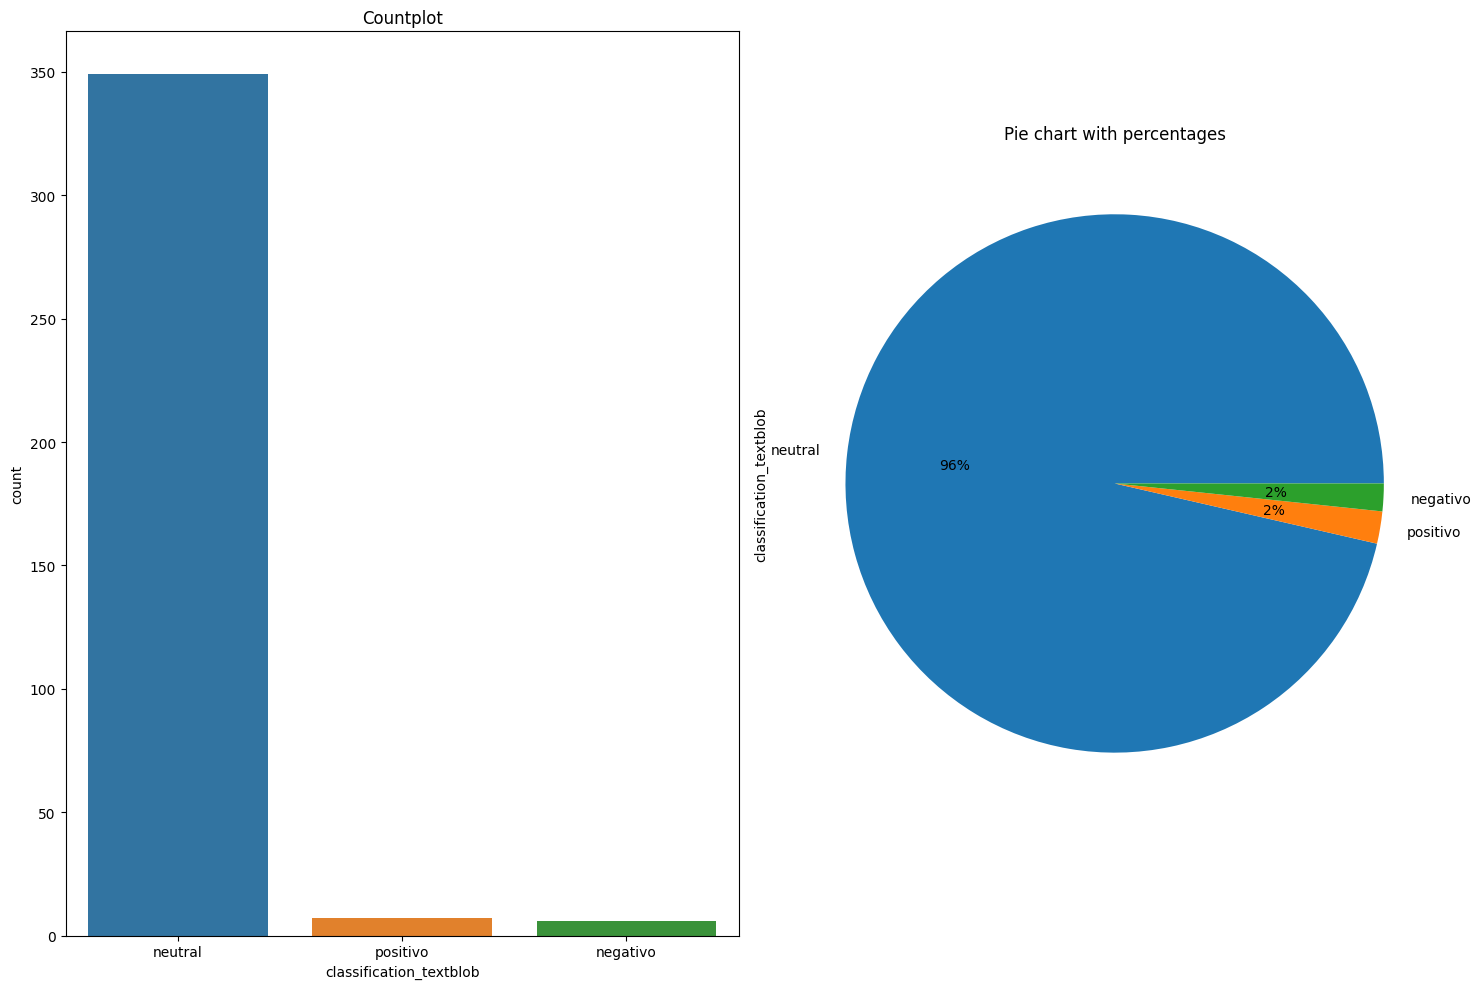

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con 2 subtramas
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Mostrar la cantidad de comentarios por clasificación en la primera subtrama
sns.countplot(x='classification_textblob', data=df, ax=axs[0])
axs[0].set_title('Countplot')

# Mostrar la cantidad de comentarios por clasificación en la segunda subtrama
df['classification_textblob'].value_counts().plot(kind='pie', autopct='%1.0f%%', ax=axs[1])
axs[1].set_title('Pie chart with percentages')

# Ajustar el espacio entre las subtramas
plt.tight_layout()

plt.show()

# Vader para asignar polaridad y subjetividad a los comentarios positivos, negativos y neutros
Para comparar los resultados de Textblob, utilizaremos Vader para asignar una polaridad y subjetividad a cada comentario.

In [13]:
# import nltk
# nltk.download('vader_lexicon')

In [14]:
# # Convertir las listas de palabras en strings
# df['textDisplay'] = df['textDisplay'].apply(' '.join)

In [15]:
# Imprimir los tipos de datos de las columnas
print(df_vader.dtypes)

textDisplay    object
dtype: object


In [16]:
print(df_vader.head())

                                          textDisplay
0   PREGUNTA: Nunca jugué a Breath of the Wild. ¿D...
2   El mejor juego de la historia es Red dead Rede...
3   Lo estoy jugando y para mi opinion todos los a...
4   Nah el nuevo mejor juego de la historia es Bal...
26  Debo ser la única persona en el mundo que se a...


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Crear el analizador de sentimientos
sia = SentimentIntensityAnalyzer()

def safe_polarity_scores(comment):
    try:
        return sia.polarity_scores(comment)
    except IndexError:
        print(f"Error with comment: {comment}")
        return None

df_vader['vader_scores'] = df_vader['textDisplay'].apply(safe_polarity_scores)

# Eliminar las filas que contienen None en la columna 'vader_scores'
df_vader = df_vader.dropna(subset=['vader_scores'])

# # Extraer la puntuación compuesta, que es una puntuación de sentimiento general que combina las puntuaciones de sentimiento positivo, negativo y neutral
df_vader['vader_compound'] = df_vader['vader_scores'].apply(lambda scores: scores['compound'])

# # # Clasificar los comentarios en base a la puntuación compuesta
# df_vader['vader_classification'] = df_vader['vader_compound'].apply(lambda score: 2 if score < -0.5 else 1 if -0.5 <= score < 0.5 else 0)

In [18]:
print(df_vader.head())

                                          textDisplay  \
0   PREGUNTA: Nunca jugué a Breath of the Wild. ¿D...   
2   El mejor juego de la historia es Red dead Rede...   
3   Lo estoy jugando y para mi opinion todos los a...   
4   Nah el nuevo mejor juego de la historia es Bal...   
26  Debo ser la única persona en el mundo que se a...   

                                         vader_scores  vader_compound  
0   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000  
2   {'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'comp...         -0.6486  
3   {'neg': 0.0, 'neu': 0.907, 'pos': 0.093, 'comp...          0.5994  
4   {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...         -0.1027  
26  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000  


In [19]:
# # Analisis visual de los resultados de Vader
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Crear una figura con 2 subtramas
# fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# # Mostrar la cantidad de comentarios por clasificación en la primera subtrama
# sns.countplot(x='vader_classification', data=df_vader, ax=axs[0])
# axs[0].set_title('Countplot')

# # Mostrar la cantidad de comentarios por clasificación en la segunda subtrama
# df_vader['vader_classification'].value_counts().plot(kind='pie', autopct='%1.0f%%', ax=axs[1])
# axs[1].set_title('Pie chart with percentages')

# # Ajustar el espacio entre las subtramas
# plt.tight_layout()

# plt.show()

Este código crea varias nuevas columnas en el DataFrame. 'vader_scores' es una columna de diccionarios que contienen las puntuaciones de sentimiento VADER para cada comentario. 'vader_compound' es una columna de las puntuaciones compuestas, que son una combinación de las puntuaciones de sentimiento positivo, negativo y neutral. 'vader_classification' es una columna de clasificaciones de sentimiento basadas en las puntuaciones compuestas, donde '2' indica un sentimiento negativo, '1' indica un sentimiento neutral y '0' indica un sentimiento positivo.

# Diferencias entre Textblob y Vader
TextBlob y VADER son dos bibliotecas populares para el análisis de sentimientos en Python, pero tienen enfoques diferentes y pueden ser más adecuadas para diferentes tipos de texto.

**TextBlob** utiliza un enfoque basado en léxico para el análisis de sentimientos. Esto significa que tiene una lista predefinida de palabras, cada una de las cuales tiene una puntuación de sentimiento asociada que varía de -1 (muy negativa) a 1 (muy positiva). TextBlob simplemente suma las puntuaciones de todas las palabras en un texto para obtener una puntuación de sentimiento total. Este enfoque es simple y rápido, pero puede no capturar con precisión el sentimiento de textos más complejos, especialmente aquellos que usan sarcasmo, doble sentido o jerga.

**VADER** (Valence Aware Dictionary and sEntiment Reasoner) también es un enfoque basado en léxico, pero es más sofisticado que TextBlob. VADER no solo tiene una lista de palabras con puntuaciones de sentimiento, sino que también tiene reglas gramaticales y sintácticas específicas para manejar cosas como intensificadores (por ejemplo, "muy" en "muy bueno"), connotaciones (por ejemplo, "no" en "no bueno"), emoticonos, acrónimos y jerga. Esto hace que VADER sea especialmente bueno para analizar el sentimiento en las redes sociales y otros textos informales.

Dado que estamos analizando comentarios de YouTube, que son textos informales, VADER es probablemente una mejor opción que TextBlob.

## Eleccion de umbral para clasificar los comentarios como positivos, negativos o neutros
Para el análisis exploratorio de los datos, podrías utilizar un histograma para visualizar la distribución de las puntuaciones de polaridad de Vader. Esto te permitirá ver dónde se encuentran la mayoría de las puntuaciones y podría ayudarte a elegir un umbral adecuado.


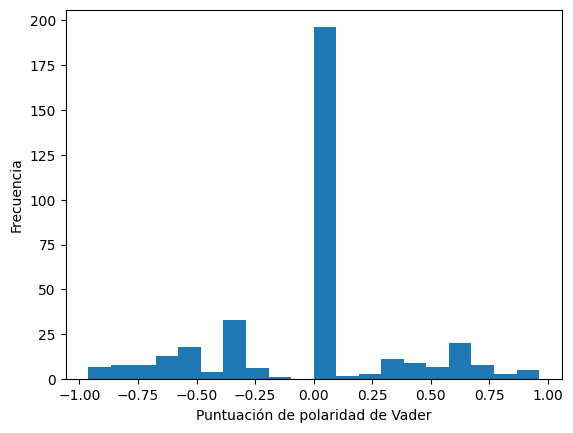

In [20]:
import matplotlib.pyplot as plt

# Crear un histograma de las puntuaciones de polaridad
plt.hist(df_vader['vader_compound'], bins=20)
plt.xlabel('Puntuación de polaridad de Vader')
plt.ylabel('Frecuencia')
plt.show()

In [21]:
import numpy as np

# Datos del histograma
hist, bin_edges = np.histogram(df_vader['vader_compound'], bins=20)

# Imprimir información formateada del histograma
for i in range(len(hist)):
    bin_range = f'({bin_edges[i]:.4f} a {bin_edges[i+1]:.6f})' if i < len(hist) - 1 else f'({bin_edges[i]:.6f} a {bin_edges[i+1]:.6f})'
    print(f'Bin {i + 1}: Hay {hist[i]} puntos de datos en el {bin_range}.')

# Manejo del último bin (para evitar errores de índice)
if len(hist) < len(bin_edges):
    last_bin_range = f'({bin_edges[-2]:.6f} a {bin_edges[-1]:.6f})'
    print(f'Bin {len(hist) + 1}: Hay {hist[-1]} puntos de datos en el {last_bin_range}.')


Bin 1: Hay 7 puntos de datos en el (-0.9628 a -0.866535).
Bin 2: Hay 8 puntos de datos en el (-0.8665 a -0.770270).
Bin 3: Hay 8 puntos de datos en el (-0.7703 a -0.674005).
Bin 4: Hay 13 puntos de datos en el (-0.6740 a -0.577740).
Bin 5: Hay 18 puntos de datos en el (-0.5777 a -0.481475).
Bin 6: Hay 4 puntos de datos en el (-0.4815 a -0.385210).
Bin 7: Hay 33 puntos de datos en el (-0.3852 a -0.288945).
Bin 8: Hay 6 puntos de datos en el (-0.2889 a -0.192680).
Bin 9: Hay 1 puntos de datos en el (-0.1927 a -0.096415).
Bin 10: Hay 0 puntos de datos en el (-0.0964 a -0.000150).
Bin 11: Hay 196 puntos de datos en el (-0.0001 a 0.096115).
Bin 12: Hay 2 puntos de datos en el (0.0961 a 0.192380).
Bin 13: Hay 3 puntos de datos en el (0.1924 a 0.288645).
Bin 14: Hay 11 puntos de datos en el (0.2886 a 0.384910).
Bin 15: Hay 9 puntos de datos en el (0.3849 a 0.481175).
Bin 16: Hay 7 puntos de datos en el (0.4812 a 0.577440).
Bin 17: Hay 20 puntos de datos en el (0.5774 a 0.673705).
Bin 18: Hay 

In [22]:
df_vader['vader_classification'] = df_vader['vader_compound'].apply(lambda score: "negativo" if score < 0.0 else "neutral" if 0.0 <= score < 0.5 else "positivo")

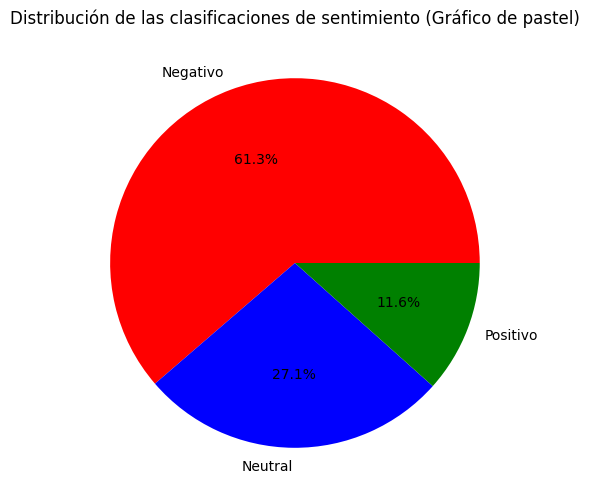

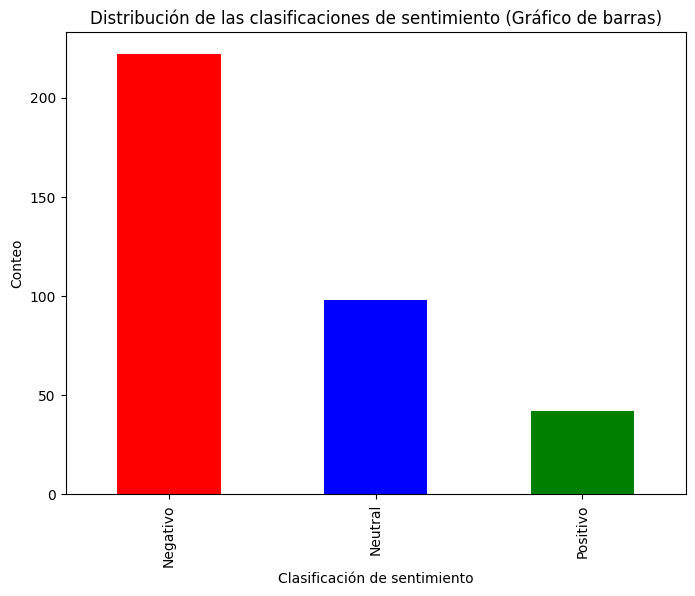

In [23]:
import matplotlib.pyplot as plt

# Calcular los conteos de cada clasificación
clasificaciones = df_vader['vader_classification'].value_counts()

# Crear la gráfica de pastel
plt.figure(figsize=(6,6))
plt.pie(clasificaciones, labels=['Negativo', 'Neutral', 'Positivo'], autopct='%1.1f%%', colors=['red', 'blue', 'green'])
plt.title('Distribución de las clasificaciones de sentimiento (Gráfico de pastel)')
plt.show()

# Crear la gráfica de barras
plt.figure(figsize=(8,6))
clasificaciones.plot(kind='bar', color=['red', 'blue', 'green'])
plt.xlabel('Clasificación de sentimiento')
plt.ylabel('Conteo')
plt.title('Distribución de las clasificaciones de sentimiento (Gráfico de barras)')
plt.xticks([0, 1, 2], ['Negativo', 'Neutral', 'Positivo'])
plt.show()

In [24]:
# Print de comentarios neutrales
print(df_vader[df_vader['vader_classification'] == 'neutral'].head(10))



                                          textDisplay  \
0   PREGUNTA: Nunca jugué a Breath of the Wild. ¿D...   
26  Debo ser la única persona en el mundo que se a...   
30                                       10/10 y good   
31     Cada minuto de este juego es una obra de arte.   
33  Acabo de adquirir una swotch, puedo jugar este...   
37  El breath of the wild fue el motivo de que apa...   
39  el juego que devuelve la ilusion por los video...   
43             Buen video pero extraño la voz antigua   
44                                               SEXO   
46                Es una locura el nuevo zelda 🤯🤯🤯😎💯💯   

                                         vader_scores  vader_compound  \
0   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   
26  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   
30  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...          0.4404   
31  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   
33  {'n

In [25]:
texto= df_vader.iloc[19]['textDisplay']
print(texto)

SEXO


In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Crear un objeto SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# texto = "El juego es muy bueno, pero tiene algunos problemas de rendimiento. En mi caso, el juego se congela cada 5 minutos, lo que hace que sea muy difícil de jugar. Espero que lo arreglen pronto."
# Texto a analizar
# texto = texto
# Calcular las puntuaciones de sentimiento
puntuaciones = analyzer.polarity_scores(texto)

print(puntuaciones)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [27]:
# Print de comentarios negativos
print(df_vader[df_vader['vader_classification'] == 'negativo'].head(10))

                                          textDisplay  \
2   El mejor juego de la historia es Red dead Rede...   
4   Nah el nuevo mejor juego de la historia es Bal...   
28  Es en serio el mejor juego de la historia? Lo ...   
32  No es por tirar hate, de hecho soy fan de la s...   
36  considero que comparado con todas las demás en...   
38  Hostias que vendidos por Dogma , el zelda es u...   
40  Creo que deberian comentar las carencias y asp...   
41     No mames y yo le regale mi switch a mi sobrina   
42  El juego es buenísimo, pero de ahí a ser el me...   
45  Que pasa si usamos un amiboo de tears of the k...   

                                         vader_scores  vader_compound  \
2   {'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'comp...         -0.6486   
4   {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...         -0.1027   
28  {'neg': 0.039, 'neu': 0.961, 'pos': 0.0, 'comp...         -0.2960   
32  {'neg': 0.136, 'neu': 0.843, 'pos': 0.021, 'co...         -0.8860   
36  {'n

In [28]:
# Print de comentarios positivos
print(df_vader[df_vader['vader_classification'] == 'positivo'].head(10))

                                           textDisplay  \
3    Lo estoy jugando y para mi opinion todos los a...   
29   Es muy buen juego pero no jodan que el mejor d...   
49   Soy fan y usuario de Playstation desde la PSOn...   
64   Tremendo juegazooo. Pense que mejor que Breath...   
135  El rey deja claro de quien es la corona! Grand...   
138                   felicidades por tus 2M se subs♥️   
151                                   Naaaaa.... 10?😂😂   
207  Nadie pone mas amor a sus juegos que Nintendo!...   
220  No dudo que puede ser el Goty de este año, per...   
274                   El mejor juego de la historia xD   

                                          vader_scores  vader_compound  \
3    {'neg': 0.0, 'neu': 0.907, 'pos': 0.093, 'comp...          0.5994   
29   {'neg': 0.145, 'neu': 0.645, 'pos': 0.21, 'com...          0.7579   
49   {'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'comp...          0.8271   
64   {'neg': 0.045, 'neu': 0.509, 'pos': 0.446, 'co...          0

In [29]:
# mostrar los comentarios positivos segun vader_compound

print(df_vader[df_vader.vader_compound > 0.0].textDisplay.head(10))

3     Lo estoy jugando y para mi opinion todos los a...
29    Es muy buen juego pero no jodan que el mejor d...
30                                         10/10 y good
37    El breath of the wild fue el motivo de que apa...
46                  Es una locura el nuevo zelda 🤯🤯🤯😎💯💯
49    Soy fan y usuario de Playstation desde la PSOn...
64    Tremendo juegazooo. Pense que mejor que Breath...
70                Elden Ring se lo come en 2 pancitos 😆
80    Eso de mejor juego,depende de para quién...yo ...
82    Pues la verdad yo me quede solo 😅con el de oca...
Name: textDisplay, dtype: object


In [30]:
positive_comments_count = df_vader[df_vader['vader_classification'] == 'positivo']['vader_compound'].count()
print("Count of positive comments:", positive_comments_count)

Count of positive comments: 42


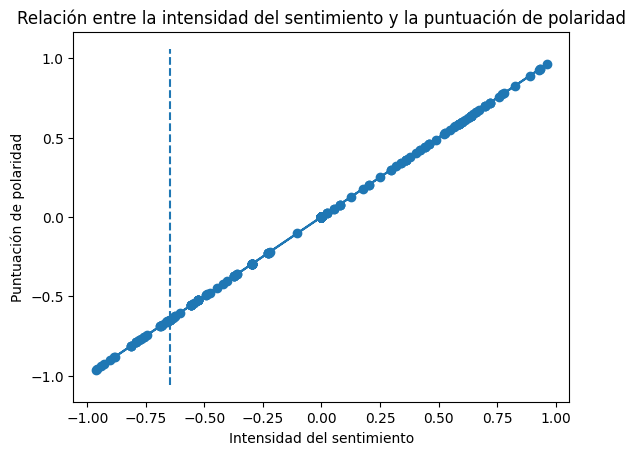

El umbral de polaridad para el punto de inflexión es: -0.6486


In [31]:
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Usa tus datos reales
sentiment_intensity = df_vader['vader_scores'].apply(lambda scores: scores['compound']).values
polarity_score = df_vader['vader_compound'].values

# Trazar la puntuación de polaridad en función de la intensidad del sentimiento
plt.plot(sentiment_intensity, polarity_score, 'o-')
plt.xlabel('Intensidad del sentimiento')
plt.ylabel('Puntuación de polaridad')
plt.title('Relación entre la intensidad del sentimiento y la puntuación de polaridad')

# Identificar el punto de inflexión
knee_locator = KneeLocator(sentiment_intensity, polarity_score, curve='convex', direction='decreasing')
plt.vlines(knee_locator.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

plt.show()

print(f"El umbral de polaridad para el punto de inflexión es: {knee_locator.knee}")

In [32]:
umbral = knee_locator.knee

In [33]:
df_vader['classification_threshold'] = df_vader['vader_compound'].apply(lambda score: "negativo" if score < umbral else "neutral" if umbral <= score < 0.25 else "positivo")

In [34]:
sentiment_counts = df_vader['classification_threshold'].value_counts()
print(sentiment_counts)


neutral     272
positivo     64
negativo     26
Name: classification_threshold, dtype: int64


In [35]:
positive_comments_count = df_vader[df_vader['vader_classification'] == 'negativo']['vader_compound'].count()
print("Count of positive comments:", positive_comments_count)

Count of positive comments: 98


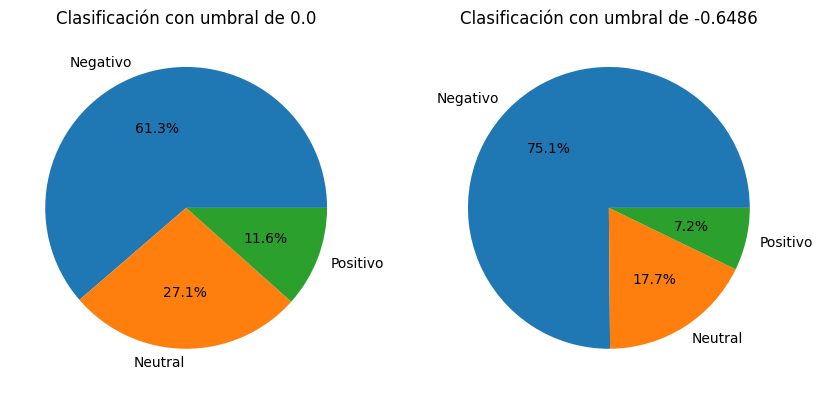

In [36]:
import matplotlib.pyplot as plt

# Calcular los porcentajes de cada clasificación
clasificaciones1 = df_vader['vader_classification'].value_counts(normalize=True)
clasificaciones2 = df_vader['classification_threshold'].value_counts(normalize=True)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Crear la primera gráfica de pastel
axs[0].pie(clasificaciones1, labels=['Negativo', 'Neutral', 'Positivo'], autopct='%1.1f%%')
axs[0].set_title('Clasificación con umbral de 0.0')

# Crear la segunda gráfica de pastel
axs[1].pie(clasificaciones2, labels=['Negativo', 'Neutral', 'Positivo'], autopct='%1.1f%%')
axs[1].set_title('Clasificación con umbral de {}'.format(umbral))

# Mostrar las gráficas
plt.show()

# Regresión logística

Ahora utilizaremos la clasificacíon hecha por vader con el umbral establecido para entrenar un modelo de regresión logística. 

Importamos la librería sklearn

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
# A df_vader solo le interesan las columnas 'textDisplay' y 'classification_threshold'
df_log = df_vader[['textDisplay', 'classification_threshold']]

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re

# Descargar las palabras vacías de NLTK solo es necesario la primera vez
#nltk.download('stopwords')
stopwords = stopwords.words('spanish')

# Función para preprocesar el texto
def preprocess_text(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    # Eliminar los caracteres no alfabéticos
    text = re.sub(r'[^a-záéíóúñü]', ' ', text)
    # Eliminar los caracteres numéricos
    text = re.sub(r'\d', ' ', text)
    # Eliminar las palabras vacías
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

# Aplicar la función de preprocesamiento al texto
df_log['textDisplay'] = df_log['textDisplay'].apply(preprocess_text)



C:\Users\dylan\AppData\Local\Temp\ipykernel_13548\2881847839.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log['textDisplay'] = df_log['textDisplay'].apply(preprocess_text)


In [40]:
df_log['classification_threshold']

0        neutral
2        neutral
3       positivo
4        neutral
26       neutral
          ...   
1031     neutral
1032     neutral
1033     neutral
1034     neutral
1035     neutral
Name: classification_threshold, Length: 362, dtype: object

In [41]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le = LabelEncoder()

# Ajustar y transformar la columna 'classification_threshold'
df_log['classification_threshold'] = le.fit_transform(df_log['classification_threshold'])

C:\Users\dylan\AppData\Local\Temp\ipykernel_13548\3328035856.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log['classification_threshold'] = le.fit_transform(df_log['classification_threshold'])


In [42]:
df_log['classification_threshold'].value_counts()	

1    272
2     64
0     26
Name: classification_threshold, dtype: int64

In [43]:
# Convertir el texto en características numéricas
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(df_log['textDisplay'])

In [44]:
# Conteo de clases
df_log['classification_threshold']

0       1
2       1
3       2
4       1
26      1
       ..
1031    1
1032    1
1033    1
1034    1
1035    1
Name: classification_threshold, Length: 362, dtype: int32

In [45]:
# Convertir el texto en características numéricas
vectorizer = TfidfVectorizer(stop_words=stopwords)
features = vectorizer.fit_transform(df_log['textDisplay'])

## Sobremuestreo clase minoritaria

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Crear un objeto SMOTE
smote = SMOTE()

# Aplicar SMOTE a los datos
features_res, classification_threshold_res = smote.fit_resample(features, df_log['classification_threshold'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_res, classification_threshold_res, test_size=0.2, random_state=42)

In [47]:
# Contar el número de muestras en cada clase
unique, counts = np.unique(classification_threshold_res, return_counts=True)

# Imprimir el número de muestras en cada clase
print(dict(zip(unique, counts)))

{0: 272, 1: 272, 2: 272}


In [48]:
# Crear un objeto LogisticRegression
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir las clasificaciones de sentimiento
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

# Calcular la precisión, la exhaustividad, el puntaje F1 y la matriz de confusión
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.94      0.87      0.90        52
           2       0.89      0.96      0.92        57

    accuracy                           0.94       164
   macro avg       0.94      0.94      0.94       164
weighted avg       0.94      0.94      0.94       164

Matriz de confusión:
 [[54  1  0]
 [ 0 45  7]
 [ 0  2 55]]


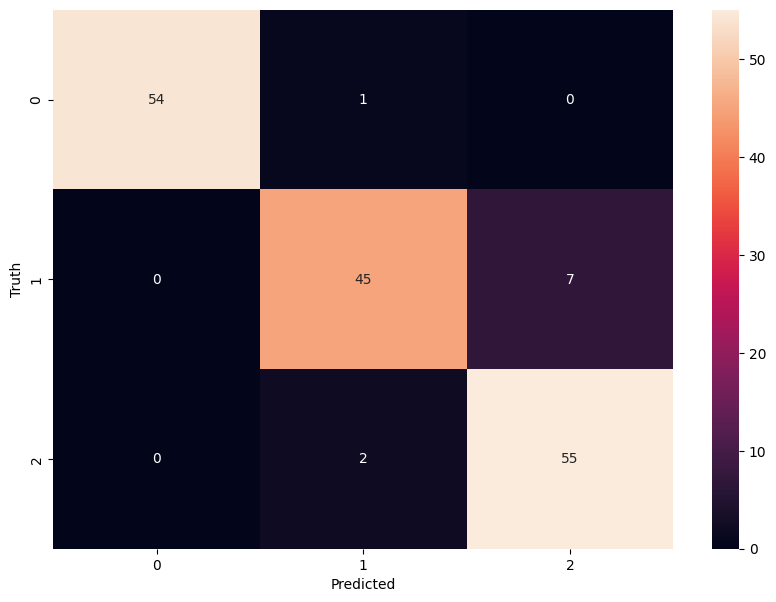

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Imprimir los resultados
print('Matriz de Confusión:')
print(cm)

# Imprimir cada valor de la matriz de confusión
for i in range(len(cm)):
    for j in range(len(cm[i])):
        print(f'Clase {i} predicha como clase {j}: {cm[i][j]} veces')

Matriz de Confusión:
[[54  1  0]
 [ 0 45  7]
 [ 0  2 55]]
Clase 0 predicha como clase 0: 54 veces
Clase 0 predicha como clase 1: 1 veces
Clase 0 predicha como clase 2: 0 veces
Clase 1 predicha como clase 0: 0 veces
Clase 1 predicha como clase 1: 45 veces
Clase 1 predicha como clase 2: 7 veces
Clase 2 predicha como clase 0: 0 veces
Clase 2 predicha como clase 1: 2 veces
Clase 2 predicha como clase 2: 55 veces


In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcular la precisión, la exhaustividad y el puntaje F1
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Imprimir los resultados
print(f'Precisión: {precision}')
print(f'Exhaustividad: {recall}')
print(f'Puntaje F1: {f1}')

Precisión: 0.9415322580645161
Exhaustividad: 0.9373716926348505
Puntaje F1: 0.938398478657518


# Guardamos el modelo

In [53]:
import pickle

# Guardar el modelo y las clases
with open('model.pkl', 'wb') as file:
    pickle.dump((model, model.classes_), file)

# Supongamos que 'vectorizer' es tu objeto TfidfVectorizer entrenado
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

# Supongamos que 'le' es tu objeto LabelEncoder entrenado
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(le, file)

In [54]:
# Asumiendo que 'model' es tu modelo entrenado y 'vectorizer' es tu CountVectorizer o TfidfVectorizer
weights = model.coef_[0]
word_index_map = vectorizer.vocabulary_

# Crear un diccionario que mapea cada palabra a su peso
word_weight_map = {word: weights[index] for word, index in word_index_map.items()}

# Imprimir el diccionario
print(word_weight_map)

{'pregunta': 0.05980207502503257, 'nunca': 0.16935799776952665, 'jugué': -0.1499140865450685, 'breath': 0.6220992748843795, 'of': 1.6305428212728705, 'the': 0.7764158190366969, 'wild': 0.500842265336984, 'debería': -0.051588017136744886, 'jugar': 0.20889720871253098, 'primero': -0.22890531405378353, 'botw': 0.6194402464908491, 'totk': 0.11142130044622602, 'tampoco': -0.12611112065825048, 'necesario': -0.051588017136744886, 'gracias': -0.3360093343360706, 'href': 0.21449195296221604, 'about': 0.08305049831826608, 'invalid': 0.08305049831826608, 'zcsafez': 0.08305049831826608, 'mejor': 1.0050332234662247, 'juego': 1.0332877662042923, 'historia': 0.06367482540801843, 'red': 1.2532466731288332, 'dead': 1.6411093917255808, 'redemption': 1.301514647362139, 'parecer': -0.17860894931849902, 'digo': -0.0033535332963640628, 'punto': 0.2693031627220893, 'vista': -0.14403674959830665, 'crítico': 0.139352348404219, 'zelda': 1.1336504675990666, 'favorito': -0.16745981473467453, 'infancia': -0.168162

In [55]:
corte = 1

print("Palabras más positivas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > corte:
        print(word, weight)

Palabras más positivas:
of 1.6305428212728705
mejor 1.0050332234662247
juego 1.0332877662042923
red 1.2532466731288332
dead 1.6411093917255808
redemption 1.301514647362139
zelda 1.1336504675990666
ser 1.0824760686570967
quiero 1.31256433618634
decir 1.2650321722901439
br 1.2519349633801926
war 1.057390835134293
resident 1.229759378575519
evil 1.229759378575519
nivel 1.7460430460851881
podemos 1.0339246056208602


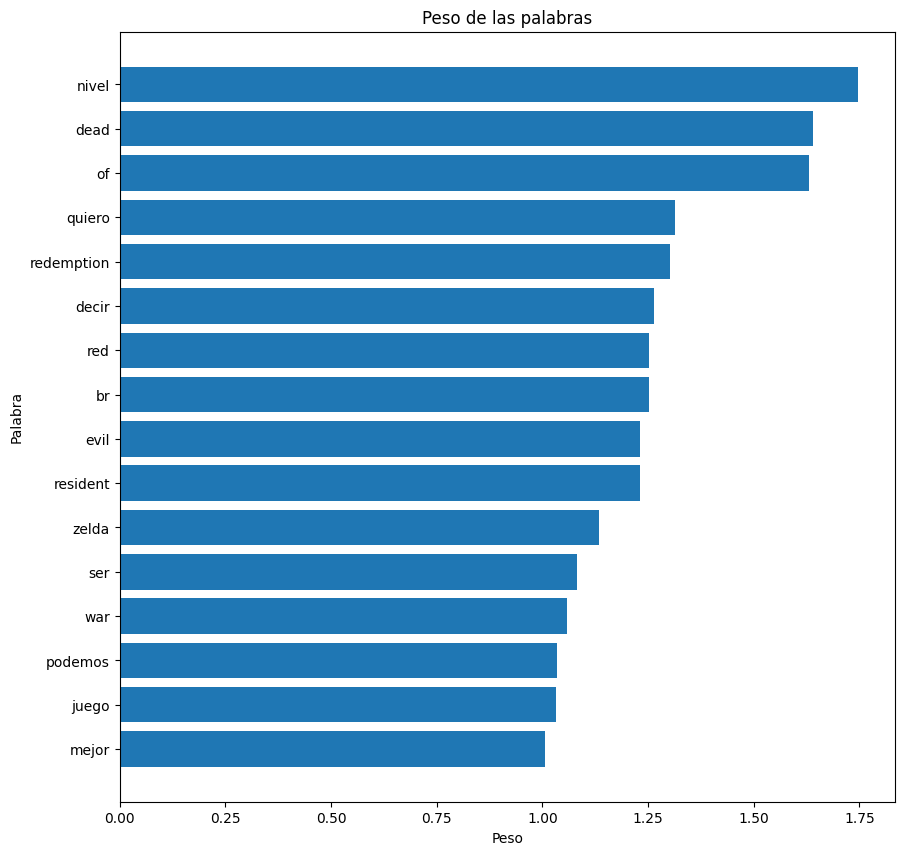

In [57]:
import matplotlib.pyplot as plt

# Asumiendo que 'model' es tu modelo entrenado y 'vectorizer' es tu CountVectorizer o TfidfVectorizer
weights = model.coef_[0]
word_index_map = vectorizer.vocabulary_

# Crear un diccionario que mapea cada palabra a su peso
word_weight_map = {word: weights[index] for word, index in word_index_map.items()}

# Definir el punto de corte
cutoff = 1

# Filtrar el diccionario para solo incluir palabras con un peso absoluto mayor a cutoff
filtered_word_weight_map = {word: weight for word, weight in word_weight_map.items() if abs(weight) > cutoff}

# Ordenar el diccionario filtrado por peso
sorted_word_weight_map = dict(sorted(filtered_word_weight_map.items(), key=lambda item: item[1]))

# Crear listas de palabras y pesos
words = list(sorted_word_weight_map.keys())
weights = list(sorted_word_weight_map.values())

# Crear un gráfico de barras
plt.figure(figsize=(10, 10))
plt.barh(words, weights)
plt.xlabel('Peso')
plt.ylabel('Palabra')
plt.title('Peso de las palabras')
plt.show()